<a href="https://colab.research.google.com/github/PhuThanh3012/Signboard-Detection/blob/main/Signboard_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download data from Google Drive**

In [ ]:
#Training data
!gdown "https://drive.google.com/file/d/1eIoqHANvHUqb0MxkBb4vEw5TmzOAoFgC/view?usp=sharing" --fuzzy -O /content/data_train.zip

#Test data
!gdown "https://drive.google.com/file/d/1a6NGdaHKFzSvljhSWofPiL4NVDbzn_a7/view?usp=sharing" --fuzzy -O /content/data_test.zip

Downloading...
From (original): https://drive.google.com/uc?id=1eIoqHANvHUqb0MxkBb4vEw5TmzOAoFgC
From (redirected): https://drive.google.com/uc?id=1eIoqHANvHUqb0MxkBb4vEw5TmzOAoFgC&confirm=t&uuid=e9dbe00d-c7ae-4ebc-8bfd-d5d7a7ebf42a
To: /content/data_train.zip
100% 60.2M/60.2M [00:01<00:00, 53.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a6NGdaHKFzSvljhSWofPiL4NVDbzn_a7
From (redirected): https://drive.google.com/uc?id=1a6NGdaHKFzSvljhSWofPiL4NVDbzn_a7&confirm=t&uuid=b11a9568-e139-4bcd-a394-aa805fc03c96
To: /content/data_test.zip
100% 312M/312M [00:03<00:00, 92.3MB/s]


In [ ]:
#Unzip training data
!unzip "/content/data_train.zip" -d "/content/data_train"

#Unzip testing data
!unzip "/content/data_test.zip" -d "/content/data_test"

Archive:  /content/data_train.zip
   creating: /content/data_train/images/
  inflating: /content/data_train/images/IMG_0001.jpg  
  inflating: /content/data_train/images/IMG_0002.jpg  
  inflating: /content/data_train/images/IMG_0003.jpg  
  inflating: /content/data_train/images/IMG_0004.jpg  
  inflating: /content/data_train/images/IMG_0005.jpg  
  inflating: /content/data_train/images/IMG_0006.jpg  
  inflating: /content/data_train/images/IMG_0007.jpg  
  inflating: /content/data_train/images/IMG_0008.jpg  
  inflating: /content/data_train/images/IMG_0009.jpg  
  inflating: /content/data_train/images/IMG_0010.jpg  
  inflating: /content/data_train/images/IMG_0011.jpg  
  inflating: /content/data_train/images/IMG_0012.jpg  
  inflating: /content/data_train/images/IMG_0013.jpg  
  inflating: /content/data_train/images/IMG_0014.jpg  
  inflating: /content/data_train/images/IMG_0015.jpg  
  inflating: /content/data_train/images/IMG_0016.jpg  
  inflating: /content/data_train/images/IMG_0

**Data Checking**\
Check data clarity, quality \
Check data labeling

0.06434252290114051 0.001037333205832991 0.920801067955341 0.5819502223922227


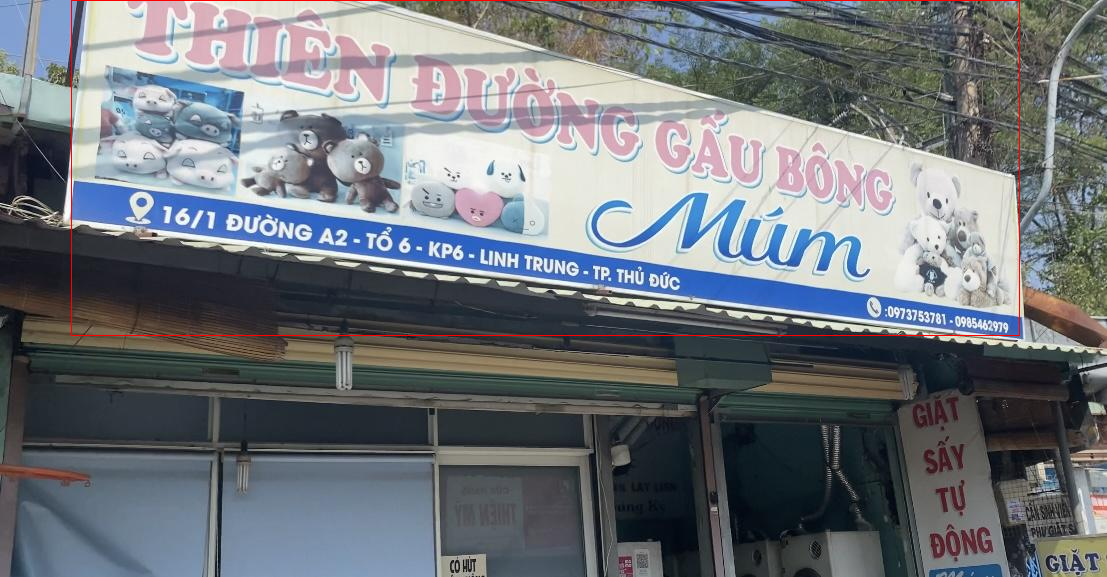

0.027560993776483023 0.0 0.9966054366806806 0.4745606011284722


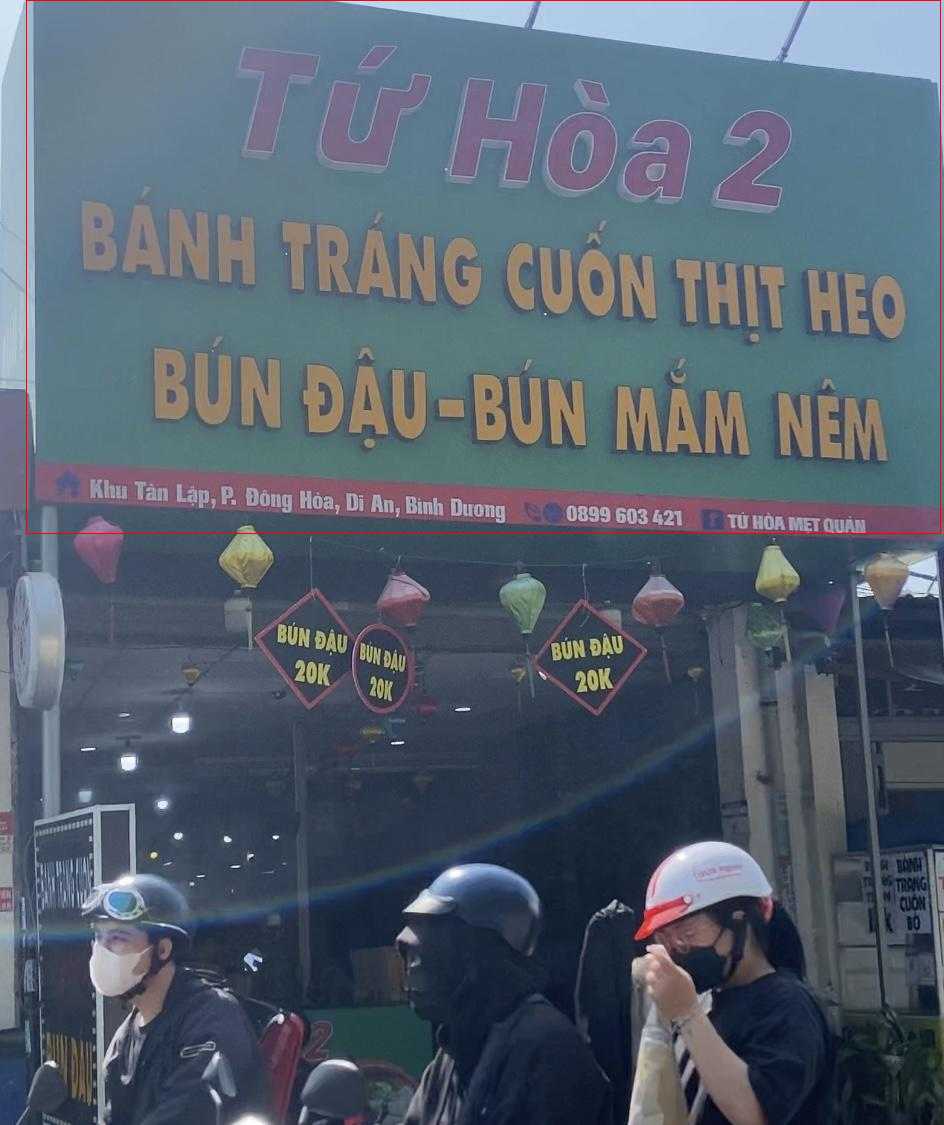

0.004483506944444493 0.010989031933664628 0.9953407118055555 0.5549450710188589


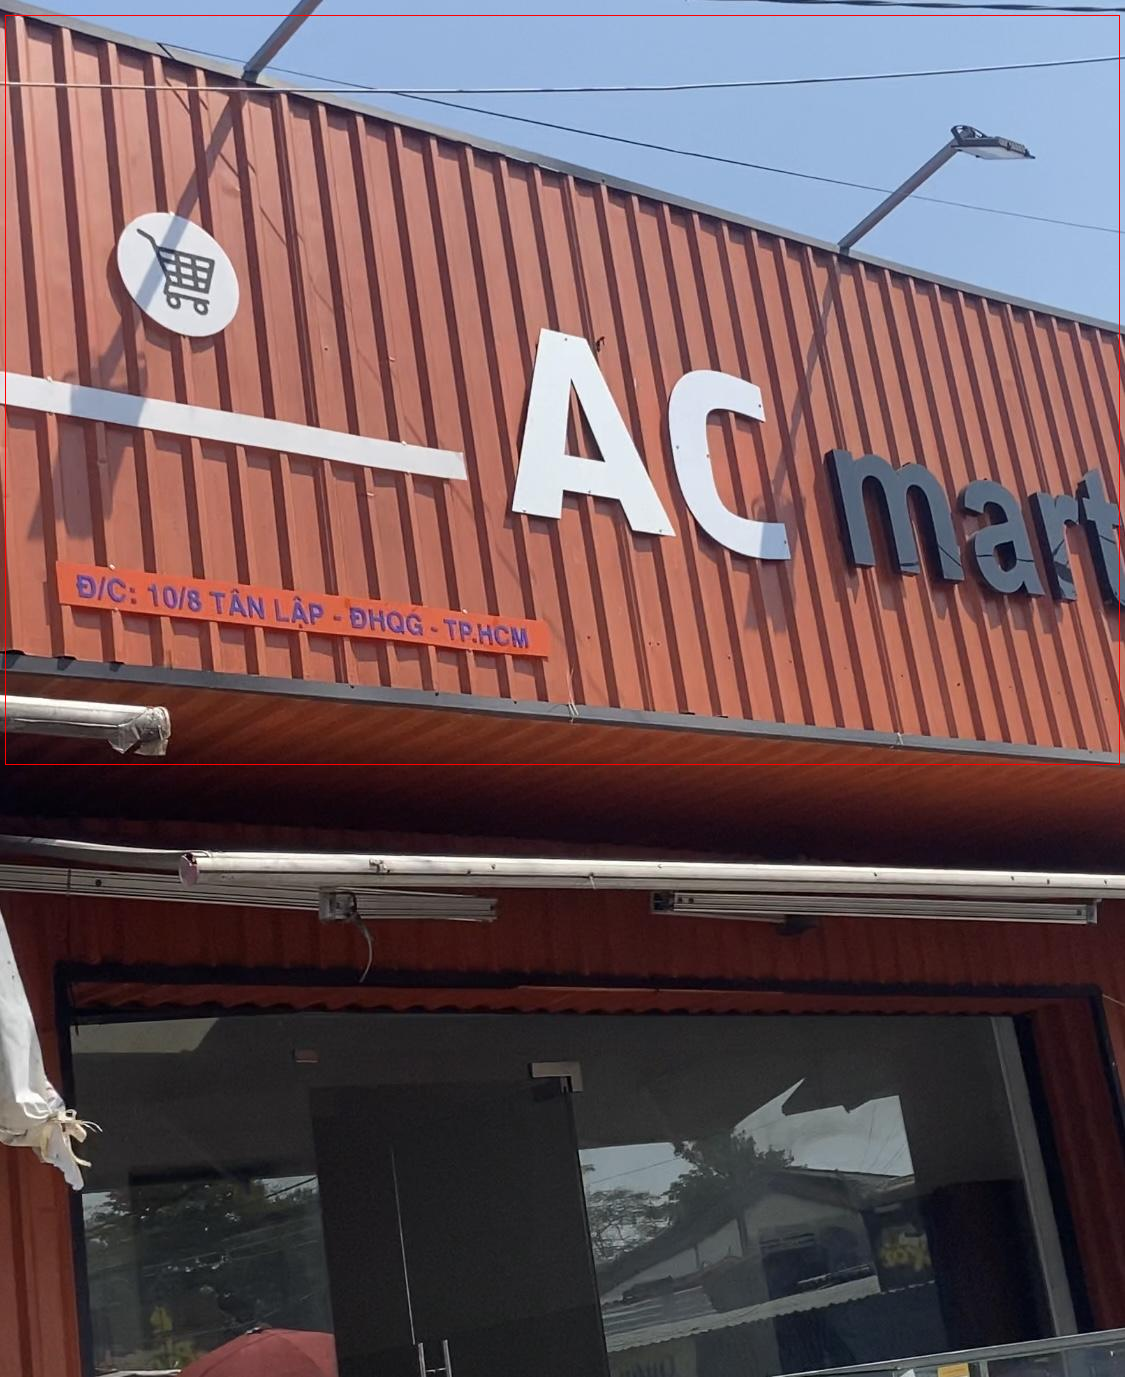

In [ ]:
import random
from pathlib import Path
from PIL import Image, ImageDraw

path_data = Path("/content/data_train/images")
list_imgs_path = list(path_data.iterdir())

imgs_visualize = random.sample(list_imgs_path, 3)

for img_path in imgs_visualize:
    img = Image.open(img_path)
    width, height = img.size
    img.resize((200, 400), Image.Resampling.LANCZOS)

    label_path = img_path.parent.parent / 'labels' / (img_path.stem + '.txt')

    bounding_boxs = open(label_path, "r").readlines()
    for bbox in bounding_boxs:
        x, y, w, h = map(float, bbox.split()[1:])

        x_min = x - w / 2
        y_min = y - h / 2
        x_max = x + w / 2
        y_max = y + h / 2

        print(x_min, y_min, x_max, y_max)

        img1 = ImageDraw.Draw(img)
        img1.rectangle([(int(x_min * width), int(y_min * height)), (int(x_max * width), int(y_max * height))], outline="red")

    display(img)

**Training data with YOLOv8**

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.9/112.6 GB disk)


**Data splitting**

In [ ]:
# Split data into 2 sets: train and validate
!mkdir /content/data_val
!mkdir /content/data_val/images
!mkdir /content/data_val/labels

list_train_data = list(path_data.iterdir())
len_val_data = len(list_imgs_path) // 5
list_imgs_path_val = random.sample(list_imgs_path, len_val_data)

# Transfer part of image, label from train dataset to validate dataset
for img_path in list_imgs_path_val:
    !mv "{img_path}" "/content/data_val/images"

    !mv "{img_path.parent.parent / 'labels' / (img_path.stem + '.txt')}" "/content/data_val/labels"

**Create model training file**

In [ ]:
# Create .yaml file for training
import yaml
import os

dataset_info = {
    'train': '/content/data_train',
    'val': '/content/data_val',
    'nc': 1,
    'names': ['SignBoard']
}

yamlfile_path = './dataset_signboard.yaml'

with open(yamlfile_path, 'w') as file:
    yaml.dump(dataset_info, file, default_flow_style=None)

**Huấn luyện mô hình**

In [ ]:
!yolo train model=yolov8n.pt data=./dataset_signboard.yaml epochs=50 imgsz=640

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset_signboard.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

In [ ]:
# Check the model's learning level on the validation dataset above
!yolo val model='/content/runs/detect/train3/weights/best.pt' data='/content/dataset_signboard.yaml'

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/data_val/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100% 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  2.05it/s]
                   all         39         64      0.926      0.777      0.882      0.686
Speed: 4.4ms preprocess, 14.3ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Testing**


image 1/1 /content/signboard_testing.jpg: 544x640 2 SignBoards, 7.8ms
Speed: 2.5ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


array([[[187, 178, 174],
        [204, 195, 191],
        [202, 193, 189],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 254, 250]],

       [[191, 180, 176],
        [201, 190, 186],
        [211, 200, 196],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 254, 250]],

       [[204, 193, 189],
        [198, 187, 183],
        [209, 197, 193],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 254, 250]],

       ...,

       [[141, 148, 151],
        [139, 146, 149],
        [142, 149, 152],
        ...,
        [145, 152, 161],
        [144, 151, 160],
        [142, 149, 158]],

       [[139, 146, 149],
        [136, 143, 146],
        [142, 147, 150],
        ...,
        [144, 151, 160],
        [144, 151, 160],
        [145, 152, 161]],

       [[139, 146, 149],
        [141, 146, 149],
        [140, 145, 148],
        ...,
        [142, 149, 158],
        [143, 150, 159],
        [146, 153, 162]]], dtype=uint8)
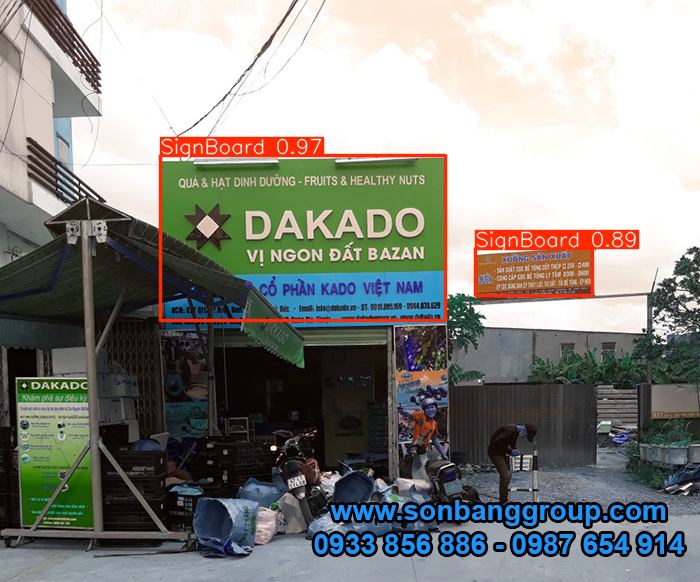

In [ ]:
from ultralytics import YOLO
from PIL import Image

# Load the trained YOLOv8 model
model = YOLO('/content/runs/detect/train3/weights/best.pt')

# Perform inference on the image
results = model('/content/signboard_testing.jpg')

# Display the results
results[0].plot()
